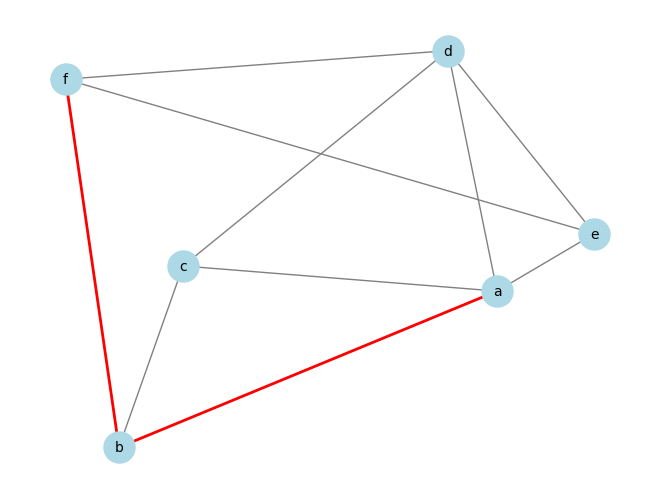

In [1]:
import tkinter as tk
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph():
    # Create a new graph
    graph = nx.Graph()

    # Get the graph input from the text widget
    input_data = input_text.get("1.0", tk.END)

    # Split the input into lines
    lines = input_data.split("\n")

    # Parse each line as an edge (assuming a simple format: "node1 node2 weight")
    for line in lines:
        nodes = line.strip().split()
        if len(nodes) == 3:
            node1, node2, weight = nodes
            graph.add_edge(node1, node2, weight=int(weight))

    # Compute the shortest path using Dijkstra's algorithm
    source = source_entry.get()
    target = target_entry.get()
    path = nx.dijkstra_path(graph, source=source, target=target)

    # Draw the graph
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='gray')

    # Highlight the shortest path
    path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2.0)

    # Display the graph
    plt.show()

# Create the main window
window = tk.Tk()
window.title("Graph Visualization with Dijkstra's Algorithm")

# Create a text widget for graph input
input_text = tk.Text(window, height=10, width=40)
input_text.pack()

# Create entry fields for source and target nodes
source_label = tk.Label(window, text="Source Node:")
source_label.pack()
source_entry = tk.Entry(window)
source_entry.pack()

target_label = tk.Label(window, text="Target Node:")
target_label.pack()
target_entry = tk.Entry(window)
target_entry.pack()

# Create a button to draw the graph
draw_button = tk.Button(window, text="Draw Graph", command=draw_graph)
draw_button.pack()

# Start the GUI event loop
window.mainloop()
